In [32]:
from mpmath import *
mp.dps = 15; mp.pretty = True
from scipy.integrate import dblquad
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import plotly.plotly as py
import sys,os
#sys.path.append(os.path.dirname(__file__), '..','Lib')
sys.path.append(os.path.join('..','Lib'))
from stylelib.ase1_styles import ase1_sims_stl
plt.style.use(ase1_sims_stl)

In [3]:
a,b = 1., -100.
# Integral over gaussian function
y = quad(lambda x: exp(-a*(x-b)**2), linspace(-1100, 1000,100))
print y*y

3.14159265358979


In [4]:
# Integral over gaussian derivatives of known values, TEST
a,b = 1000., 36. # High 'a' turns integral into a delta function
y = quad(lambda x: x*exp(-a*(x-b)**2), linspace(-200, 100, 100))
print y*sqrt(a/pi)
# Integrals seem to always converge when the number of intervals ~= the coefficient of the exponent

36.000000000238


In [6]:
# Double integrals of known values, TEST
k = 1000.0 # spring constant
f1 = lambda x1, x2: exp(-0.5*k*(x1**2 + x2**2 - 2*sqrt(1-(1/k))*x1*x2))
q = quad(f1, linspace(-10, 10, 12), linspace(-10, 10, 12))
#q = quad(f1, [-10, 10], [-10, 10])
print (q*sqrt(k))/(2.*pi)

0.999999999999702


In [7]:
# How does scipy's double quad method stack up to sympy? TEST
f1 = lambda x1, x2: np.exp(-0.5*k*(np.power(x1,2) + np.power(x2,2) - 2.*np.sqrt(1-(1/k))*x1*x2))
q, _= dblquad(f1, -10,10, lambda x2:-10, lambda x2:10, epsabs=0, epsrel=1.e-8)
#q = quad(f1, [-10, 10], [-10, 10])
print (q*sqrt(k))/(2.*np.pi)

0.999999999966961


In [24]:
# Force between parallel filaments of equal length, TESTED
k = 4.56 # spring constant
b = 1. # beta
yo = 1. # Horizontal separation
Dr = 10. # COM separation
ho = 0. # equilibrium length
c = 100. # Crosslinker affinity * fugacity
hL = 10. # Length of filaments
#fdr = lambda x1, x2, r:-1.*c*k*(x1 - x2 + r)*(1. - (ho/np.sqrt(np.power(x1-x2+r,2)+np.power(yo,2))))*np.exp(-.5*k*b*np.power(np.sqrt(np.power(x1-x2+r,2)+np.power(yo,2))-ho, 2))
fdr = lambda x1, x2, r:-1.*c*k*(x1 - x2 + r)*np.exp(-.5*k*b*np.power(np.power(x1-x2+r,2)+np.power(yo,2), 2))
#print fdr(0,0)
f, err = dblquad(fdr, -hL, hL, lambda x2:-hL, lambda x2:hL, args=[0.], epsabs=0, epsrel=1.e-13)
print f, err

0.0 9.91767786532e-14


In [15]:
# Scan over multiple values of Delta r
Dr_list = np.linspace(-22, 22, 100).tolist()
f_list = [dblquad(fdr, -hL, hL, lambda x2:-hL, lambda x2:hL, args = [r], epsabs=0, epsrel=1.e-13) for r in Dr_list]
f_arr = np.array(f_list)

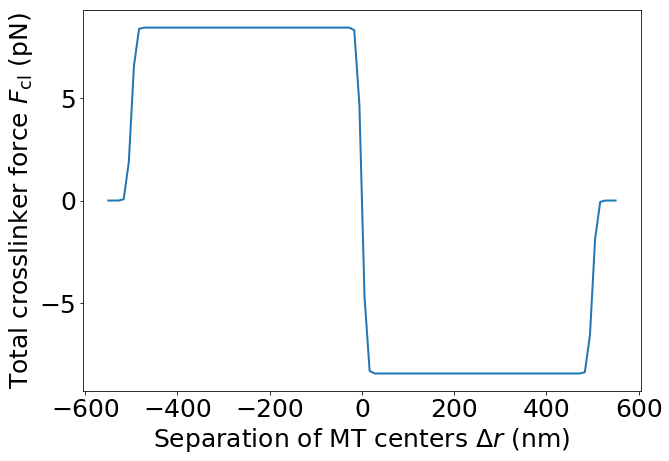

In [26]:
# Graph scan over area
fig, ax = plt.subplots(figsize=(10,7))
ax.errorbar(np.array(Dr_list)*25., f_arr[:,0]*.1644*16, yerr=f_arr[:,1]*.1644)
#ax.set_xlim((-22,22))
ax.set_xlabel(r'Separation of MT centers $\Delta r$ (nm)')
ax.set_ylabel(r'Total crosslinker force $F_{\rm cl}$ (pN)')
plt.show()


In [22]:
# Partition function for parallel filaments as a function of delta r
Ndr = lambda x1, x2, r:c*np.exp(-.5*k*b*np.power(np.sqrt(np.power(x1-x2+r,2)+np.power(yo,2))-ho, 2))

In [27]:
N_list = [dblquad(Ndr, -hL, hL, lambda x2:-hL, lambda x2:hL, args = [r], epsabs=0, epsrel=1.e-13) for r in Dr_list]
N_arr = np.array(N_list)

In [21]:
# Graph number of crosslinkers based off partition function
fig, ax = plt.subplots(figsize=(10,7))
ax.errorbar(np.array(Dr_list)*25., N_arr[:,0], yerr=N_arr[:,1])
#ax.set_xlim((-22,22))
ax.set_xlabel(r'Separation of MT centers $\Delta r$ (nm)')
ax.set_ylabel(r'Total number of crosslinkers $N_{\rm cl}$')
plt.show()

NameError: name 'N_arr' is not defined

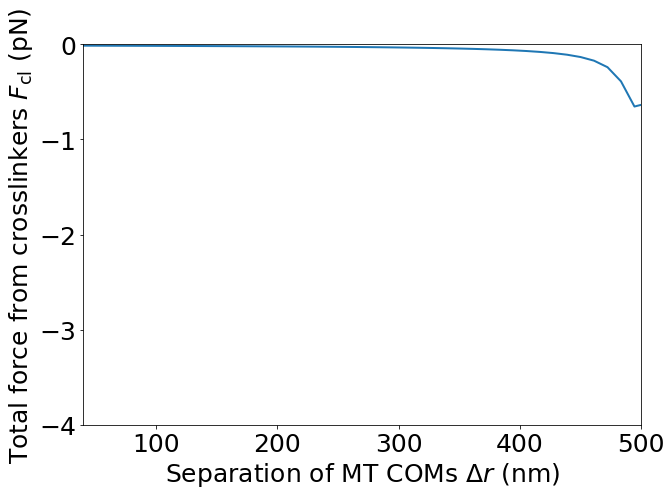

In [46]:
# Canonical force calculation
fig, ax = plt.subplots(figsize=(10,7))

ax.set_xlim((40,500))
ax.set_ylim((-4, 0))
ax.plot(np.array(Dr_list)*25., np.divide(f_arr[:,0],N_arr[:,0]))
ax.set_xlabel(r'Separation of MT COMs $\Delta r$ (nm)')
ax.set_ylabel(r'Total force from crosslinkers $F_{\rm cl}$ (pN)')
plt.show()

In [114]:
# Crosslinkers with some equilibrium length
ho = 2.28
k = 31.25
Dr_list = np.linspace(-22, 22, 100).tolist()
fho_list = [dblquad(fdr, -hL, hL, lambda x2:-hL, lambda x2:hL, args = [r], epsabs=0, epsrel=1.e-13) for r in Dr_list]
fho_arr = np.array(f_list)

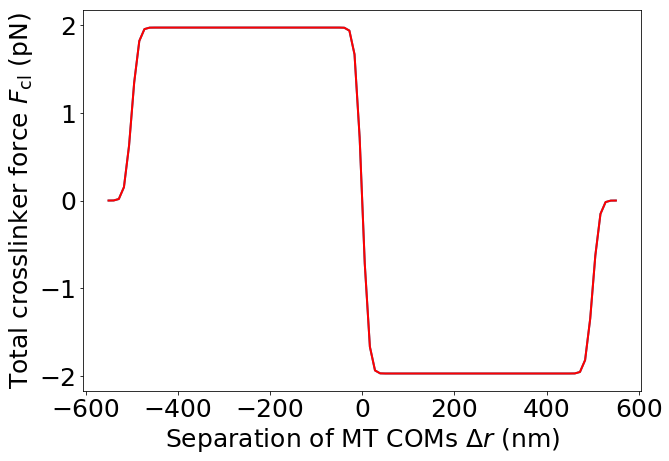

In [115]:
# Graph scan over area
fig, ax = plt.subplots(figsize=(10,7))
ax.errorbar(np.array(Dr_list)*25., fho_arr[:,0]*.1644, yerr=fho_arr[:,1]*.1644)
ax.errorbar(np.array(Dr_list)*25., f_arr[:,0]*.1644, yerr=f_arr[:,1]*.1644, c='r')
#ax.set_xlim((-22,22))
ax.set_xlabel(r'Separation of MT COMs $\Delta r$ (nm)')
ax.set_ylabel(r'Total crosslinker force $F_{\rm cl}$ (pN)')
plt.show()

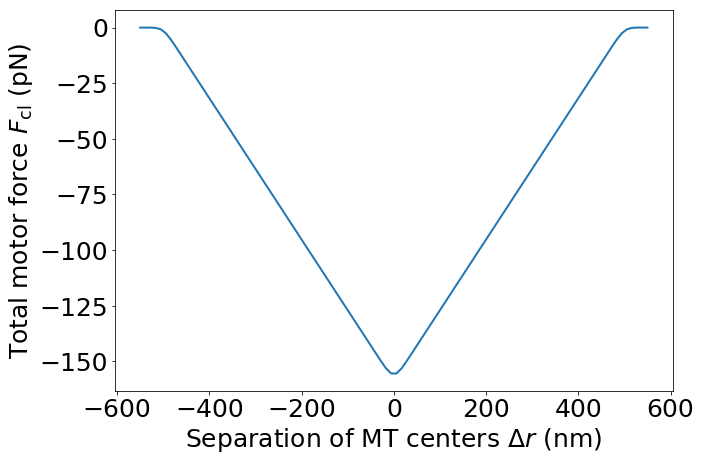

In [36]:
fig, ax = plt.subplots(figsize=(10,7))
Fs = 6.08 # Crosslinker stall force
maxx = np.sqrt(np.power(Fs/k,2)-np.power(yo,2))
ax.errorbar(np.array(Dr_list)*25., -k*maxx*N_arr[:,0]*.1644, yerr=N_arr[:,1]*.1644)
#ax.set_xlim((-22,22))
ax.set_xlabel(r'Separation of MT centers $\Delta r$ (nm)')
ax.set_ylabel(r'Total motor force $F_{\rm cl}$ (pN)')
plt.show()

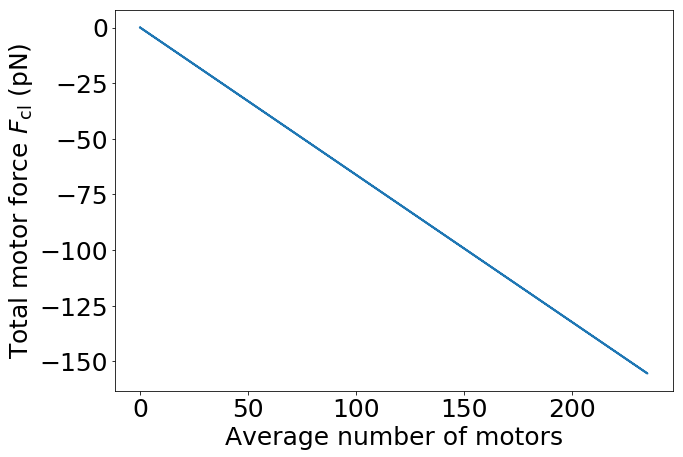

In [44]:
fig, ax = plt.subplots(figsize=(10,7))
Fs = 6.08 # Crosslinker stall force
maxx = np.sqrt(np.power(Fs/k,2)-np.power(yo,2))
ax.errorbar(N_arr[:,0], -k*maxx*N_arr[:,0]*.1644, yerr=N_arr[:,1]*.1644)
#ax.set_xlim((-22,22))
ax.set_xlabel(r'Average number of motors')
ax.set_ylabel(r'Total motor force $F_{\rm cl}$ (pN)')
plt.show()